# Exploratory Data Analysis with Titanic Data Set

In [85]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.75)

In [86]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
test_Id = test['PassengerId']

In [89]:
all_features = pd.concat((train, test), sort = False)

In [90]:
all_features.drop('PassengerId', axis =1, inplace = True)

In [91]:
all_features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#Missing Value treatment

In [92]:
all_features.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [98]:
all_features.shape[0]*100

130900

In [99]:
missing_values = (all_features.isnull().sum()/all_features.shape[0]  *100).sort_values(ascending = False)
missing_values

Cabin       77.463713
Survived    31.932773
Age         20.091673
Embarked     0.152788
Fare         0.076394
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
dtype: float64

In [100]:
all_features['Age'].fillna(all_features['Age'].mean(), inplace = True)

# Feature Engineering

In [101]:
def expand_embark_acronym(embarked):
    result = []
    mapping = {
            "C": "Cherbourg",
            "S": "Southampton",
            "Q": "Queenstown"
    }    
    for each in embarked.values:
        if len(str(each)) > 1:
            result.append(each)
        else:        
            if each in mapping:
                result.append(mapping[each])
            else:
                result.append("Unknown")
    return result

def expand_pclass_acronym(pclass):
    result = []
    mapping = {
            1: "1st class",
            2: "2nd class",
            3: "3rd class"
    }    
    for each in pclass.values:
        if len(str(each)) > 1:
            result.append(each)
        else:
            if each in mapping:
                result.append(mapping[each])
            else:
                result.append("Unknown")
    return result

def is_a_minor(age):
    
    if age < 18:
        return "Under 18 (minor)"
    
    return "Adult"

# See https://help.healthycities.org/hc/en-us/articles/219556208-How-are-the-different-age-groups-defined-
def apply_age_groups(age):
    result = []
    mapping = {
            1: "Infant",      # Infants: <1
           13: "Child",       # Children: <18, <11 or K - 7th grade
           18: "Teen",        # Teens: 13-17 (Teens, who are not Adults)
           66: "Adult",       # Adults: 20+ (includes adult teens: 18+)
           123: "Elderly"     # Elderly: 65+ (123 is the oldest age known till date)
    }    
    for each_age in age.values:
        if type(each_age) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_age != np.nan:
                for each_age_range in mapping:
                    if  each_age < each_age_range:
                        category = mapping[each_age_range]
                        break
            result.append(category)
    return result

def apply_age_ranges(age):
    result = []
    mapping = {
            6: "00-05 years",
           12: "06-11 years",     
           19: "12-18 years",
           31: "19-30 years",
           41: "31-40 years",
           51: "41-50 years",
           61: "51-60 years",
           71: "61-70 years",
           81: "71-80 years",
           91: "81-90 years",
           124: "91+ years",  # (123 is the oldest age known till date)
    }
            
    for each_age in age.values:
        if type(each_age) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_age != np.nan:
                for each_age_range in mapping:
                    if  each_age < each_age_range:
                        category = mapping[each_age_range]
                        break
            result.append(category)
    return result

def is_married_of_single(names, ages, sexes):
    result = []
    for name, age, sex in zip(names.values, ages.values, sexes.values):
        if age < 18:
            result.append("Not of legal age")
        else:
            if ('Mrs.' in name) or ('Mme.' in name):
                result.append("Married")
            elif ('Miss.' in name) or ('Ms.' in name) or ('Lady' in name) or ('Mlle.' in name):
                result.append("Single")
            else:
                result.append("Unknown")
    
    return result

def apply_travel_companions(siblings_spouse, parent_children):
    result = []
    for siblings_spouse_count, parent_children_count in zip(siblings_spouse.values, parent_children.values):
        if (siblings_spouse_count > 0) and (parent_children_count > 0):
            result.append("Parent/Children & Sibling/Spouse")
        else:
            if (siblings_spouse_count > 0):
                result.append("Sibling/Spouse")
            elif (parent_children_count > 0):
                result.append("Parent/Children")
            else:
                result.append("Alone")
    
    return result

def apply_fare_ranges(fare):
    result = []
    mapping = {
           11: "$000 - 010",
           21: "$011 - 020",     
           41: "$020 - 040",
           81: "$041 - 080",
          101: "$081 - 100",
          201: "$101 - 200",
          301: "$201 - 300",
          401: "$301 - 400",
          515: "$401 & above"  # in this case the max fare is around $512
    }    
    for each_fare in fare.values:
        if type(each_fare) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_fare != np.nan:
                for each_fare_range in mapping:
                    if  each_fare < each_fare_range:
                        category = mapping[each_fare_range]
                        break
            result.append(category)

    return result

def were_in_a_cabin_or_not(row):
    if type(row) is str:
        return "In a Cabin"
    return "Not in a Cabin"

In [102]:
## Embarked: Place of embarkation
all_features['Embarked'] = expand_embark_acronym(all_features['Embarked'])

# Pclass: Passenger Class
all_features['Pclass'] = expand_pclass_acronym(all_features['Pclass'])

# Age
all_features['Adult_or_minor'] = all_features['Age'].apply(is_a_minor)
females_filter = all_features['Sex'] == 'female'
adult_filter = all_features['Adult_or_minor'] == '2. Adult'

all_features['Marital_status'] = is_married_of_single(all_features['Name'], all_features['Age'], all_features['Sex']) 
all_features['Age_group'] = apply_age_groups(all_features['Age'])
all_features['Age_ranges'] = apply_age_ranges(all_features['Age'])

# SibSp and Parch: Sibling/Spouse counts, Parent/Children counts
all_features['Travel_companion'] = apply_travel_companions(all_features['SibSp'], all_features['Parch'])

# Fare: ticket fare across the different classes
all_features['Fare_range'] = apply_fare_ranges(all_features['Fare'])

# Cabin: ticket holder has a cabin or not
all_features['In_Cabin'] = all_features['Cabin'].apply(were_in_a_cabin_or_not)
all_features['Cabin'] = all_features['Cabin'].fillna('No cabin')

In [103]:
all_features.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Adult_or_minor,Marital_status,Age_group,Age_ranges,Travel_companion,Fare_range,In_Cabin
0,0.0,3rd class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No cabin,Southampton,Adult,Unknown,Adult,19-30 years,Sibling/Spouse,$000 - 010,Not in a Cabin
1,1.0,1st class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult,Married,Adult,31-40 years,Sibling/Spouse,$041 - 080,In a Cabin
2,1.0,3rd class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,Southampton,Adult,Single,Adult,19-30 years,Alone,$000 - 010,Not in a Cabin
3,1.0,1st class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Adult,Married,Adult,31-40 years,Sibling/Spouse,$041 - 080,In a Cabin
4,0.0,3rd class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No cabin,Southampton,Adult,Unknown,Adult,31-40 years,Alone,$000 - 010,Not in a Cabin


In [104]:
missing_values = (all_features.isnull().sum()/all_features.shape[0]  *100).sort_values(ascending = False)
missing_values

Survived            31.932773
Embarked             0.152788
Fare                 0.076394
Fare_range           0.000000
Travel_companion     0.000000
Age_ranges           0.000000
Age_group            0.000000
Marital_status       0.000000
Adult_or_minor       0.000000
Cabin                0.000000
Pclass               0.000000
Ticket               0.000000
Parch                0.000000
SibSp                0.000000
Age                  0.000000
Sex                  0.000000
Name                 0.000000
In_Cabin             0.000000
dtype: float64

In [105]:
def passenger_stats(dataset):
    total_ticket_holders = dataset.shape[0]
    siblings_count = dataset['SibSp'].sum()
    parents_children_count = dataset['Parch'].sum()
    
    print("total_ticket_holders:", total_ticket_holders)
    print("siblings_count:", siblings_count)
    print("parents_children_count:", parents_children_count)
    print("total (siblings, parents and children count):", siblings_count + parents_children_count)

    grand_total = total_ticket_holders + siblings_count + parents_children_count
    print("grand total (ticket holders, siblings, parents, children count):", grand_total)
    
    return grand_total

training_dataset_passengers_count = passenger_stats(all_features)

total_ticket_holders: 1309
siblings_count: 653
parents_children_count: 504
total (siblings, parents and children count): 1157
grand total (ticket holders, siblings, parents, children count): 2466


Creating the test & train dataset again.

In [106]:
train = all_features[: 891]
test = all_features[891:]

In [107]:
print(train.shape)
print(test.shape)

(891, 18)
(418, 18)


In [108]:
missing_values = (test.isnull().sum()/test.shape[0]  *100).sort_values(ascending = False)
missing_values

Survived            100.000000
Fare                  0.239234
Embarked              0.000000
Fare_range            0.000000
Travel_companion      0.000000
Age_ranges            0.000000
Age_group             0.000000
Marital_status        0.000000
Adult_or_minor        0.000000
Cabin                 0.000000
Pclass                0.000000
Ticket                0.000000
Parch                 0.000000
SibSp                 0.000000
Age                   0.000000
Sex                   0.000000
Name                  0.000000
In_Cabin              0.000000
dtype: float64

Remove the Survived Variable from the test dataset since it's empty ans the test dataset shouldn't contain the Target Variable.

In [109]:
test.drop('Survived',axis = 1, inplace = True)

C:\Users\lara\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Analysis

# Distribution of the dataset

C:\Users\lara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

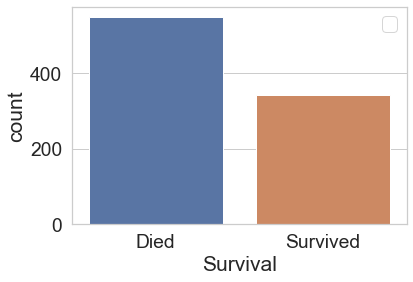

In [110]:
g = sns.countplot(train['Survived'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"]) # "0=Died", "1=Survived"

# Sex of the passenger associated with Survival 

C:\Users\lara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

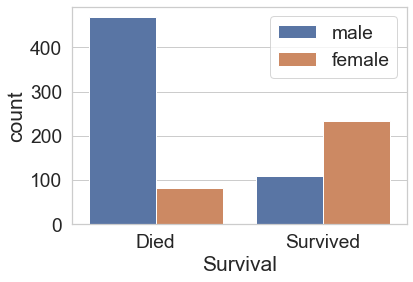

In [111]:
g = sns.countplot(train['Survived'], hue = train['Sex'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

# Passenger Class associated with survival

C:\Users\lara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Survival'), [Text(0, 0, 'Died'), Text(1, 0, 'Survived')]]

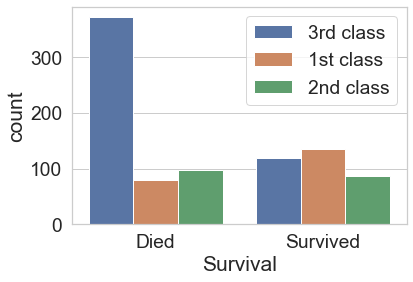

In [112]:
g = sns.countplot(train['Survived'], hue = train['Pclass'])
plt.legend(loc='upper right')
g.set(xlabel="Survival", xticklabels=["Died", "Survived"])

In [113]:
gender_class_pivot = train.pivot_table(values=['Survived'], index=['Sex', 'Pclass'])
gender_class_pivot

Survived
Sex    Pclass             
female 1st class  0.968085
       2nd class  0.921053
       3rd class  0.500000
male   1st class  0.368852
       2nd class  0.157407
       3rd class  0.135447

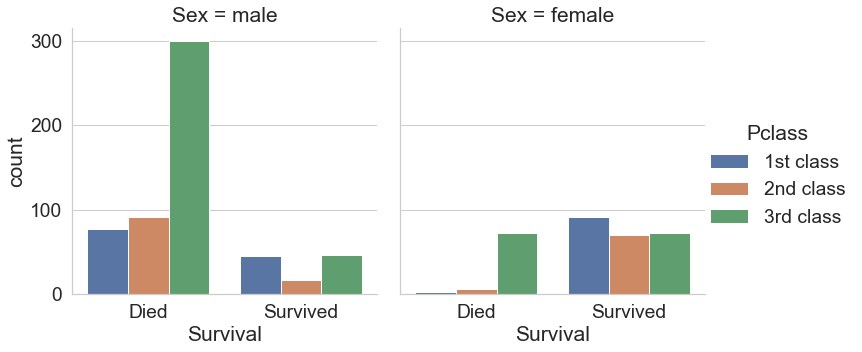

In [114]:
g = sns.catplot(x="Survived", hue="Pclass", col='Sex', data=train.sort_values(by='Pclass'), kind='count')
g.set(xticklabels=['Died', 'Survived'], xlabel="Survival")

3rd Class male passengers forms the largest group who died. In all the three classes femely passengers survived the most.

# Fares Paid associated with Survival

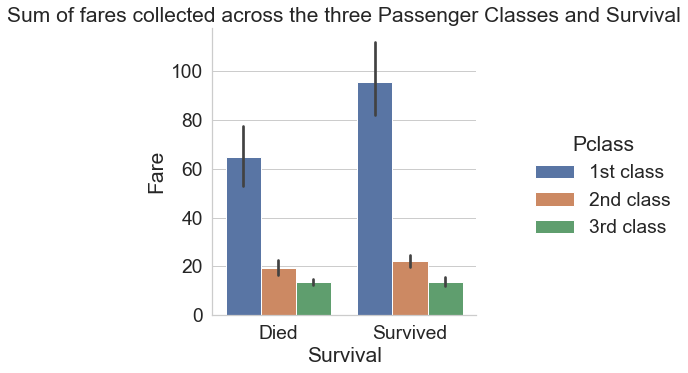

In [115]:
g = sns.catplot(x="Survived", y="Fare", hue="Pclass", data=train.sort_values(by='Pclass'), kind="bar");
g.set(xticklabels=['Died', 'Survived'], xlabel="Survival", title="Sum of fares collected across the three Passenger Classes and Survival")

C:\Users\lara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


[Text(0.5, 0, 'Passenger Class')]

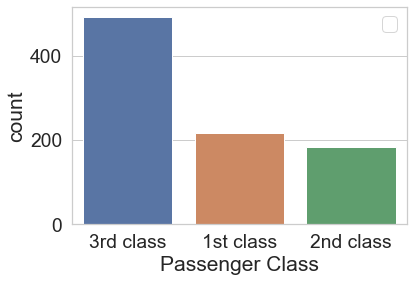

In [116]:
g = sns.countplot(train['Pclass'])
plt.legend(loc='upper right')
g.set(xlabel="Passenger Class")

Though the 3rd Class passengers forms the largest group but it's the 1st Class passengers who survived the most. This shows Rescue services were provided to wealthy passengers.


# Passenger fare range with survival

In [117]:
def fare_range_with_survival( passenger_class, title):
    dataset = train.copy()
    class_filter = dataset['Pclass'] == passenger_class
    dataset = dataset[class_filter]

    dataset[class_filter]
    g = sns.catplot(y="Fare_range", hue="Survived", data=dataset.sort_values(by='Pclass'), kind="count")
    g.set(ylabel="Fare range", title=title)

    new_labels = ['Died', 'Survived']
    for t, l in zip(g._legend.texts, new_labels):
      t.set_text(l)
    g.fig.set_figwidth(35)  

<ipython-input-117-67b1a733f08b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[class_filter]


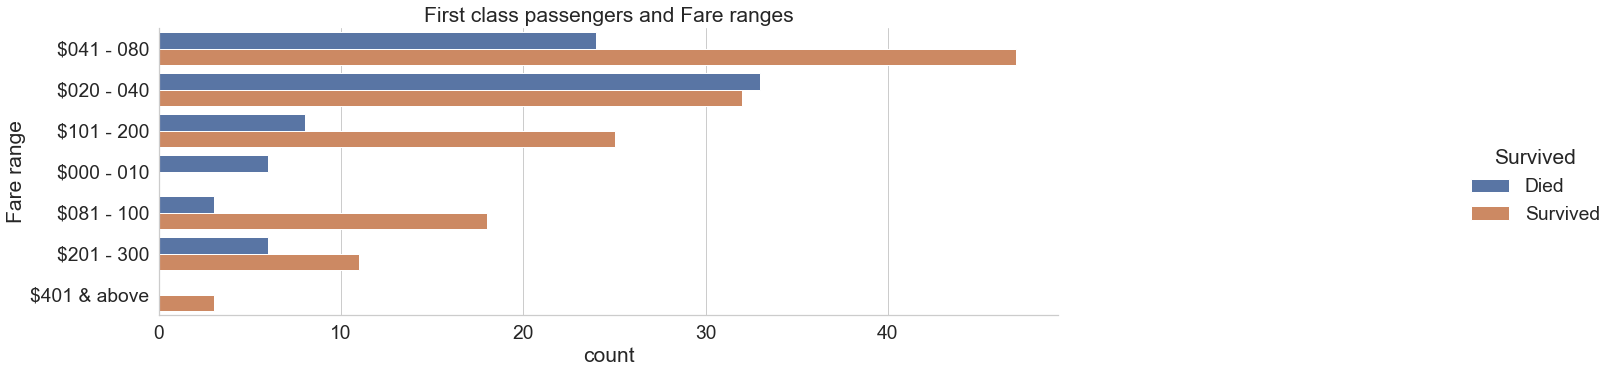

In [118]:
fare_range_with_survival('1st class', "First class passengers and Fare ranges")

<ipython-input-117-67b1a733f08b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[class_filter]


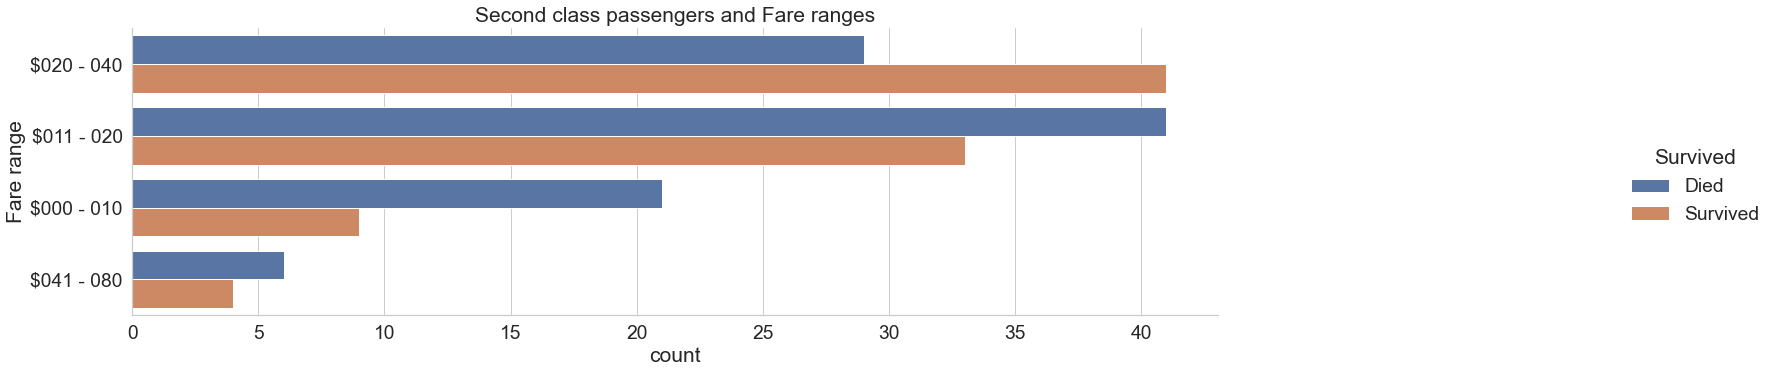

In [119]:
fare_range_with_survival('2nd class', "Second class passengers and Fare ranges")

<ipython-input-117-67b1a733f08b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[class_filter]


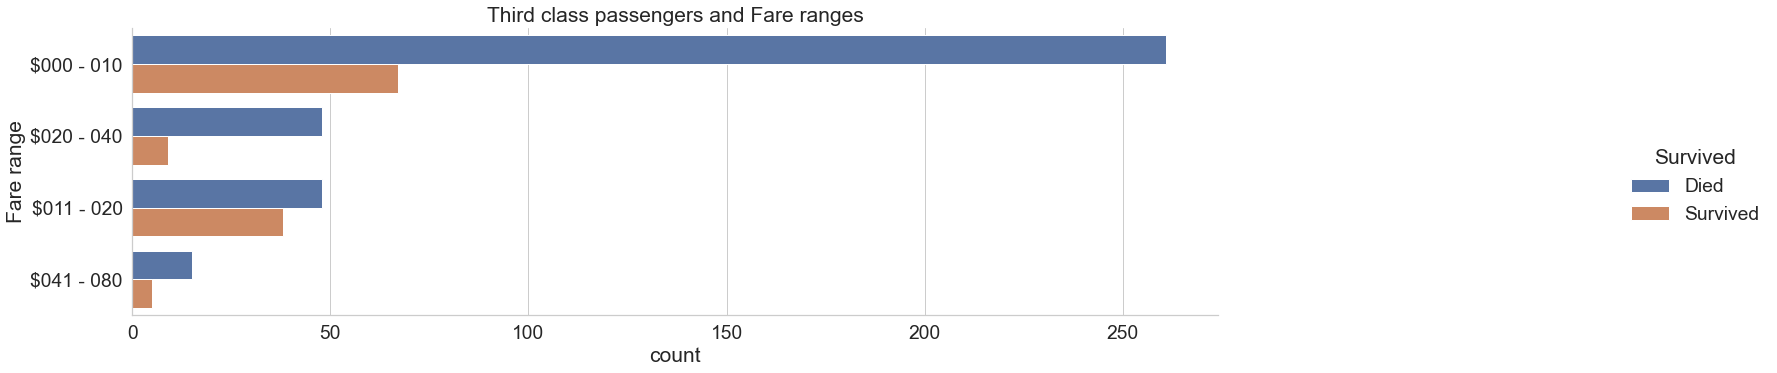

In [120]:
fare_range_with_survival('3rd class', "Third class passengers and Fare ranges")

# Survival with age

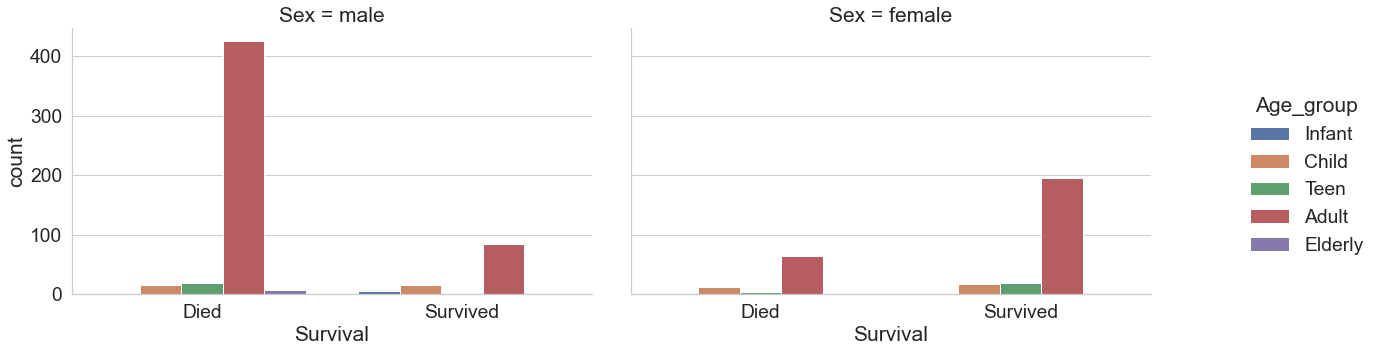

In [121]:
g = sns.catplot(col="Sex", x="Survived", hue="Age_group", data=train.sort_values(by='Age'), kind='count')
g.set(xlabel="Survival", xticklabels=['Died', 'Survived'])
g.fig.set_figwidth(20)

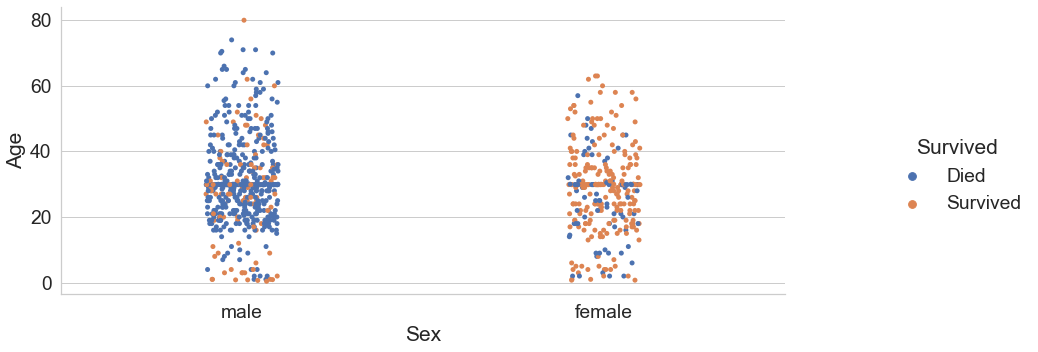

In [122]:
g = sns.catplot(y="Age", x="Sex", hue="Survived", data=train)
new_labels = ['Died', 'Survived']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)
g.fig.set_figwidth(16)

# Survival with Travel Companion

Text(0, 0.5, 'Sibling/spouse count')

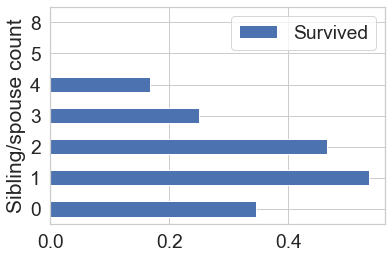

In [123]:
sibling_spouse_pivot_table = train.pivot_table(values = ['Survived'],index = 'SibSp')
sibling_spouse_pivot_table
sibling_spouse_pivot_table.plot(kind='barh')
plt.ylabel('Sibling/spouse count')

Text(0, 0.5, 'Parent/children count')

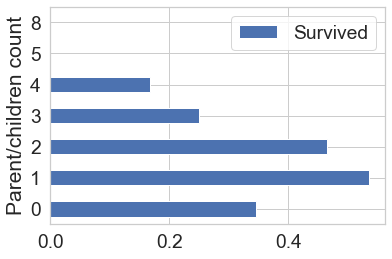

In [124]:
parent_children_pivot_table = train.pivot_table(values = ['Survived'],index = 'SibSp')
parent_children_pivot_table
sibling_spouse_pivot_table.plot(kind='barh')
plt.ylabel('Parent/children count')

Text(0, 0.5, 'Travel Companion')

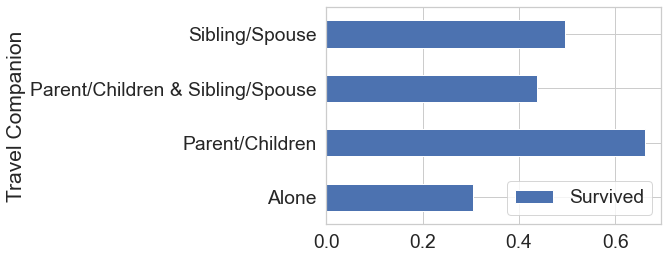

In [125]:
travel_companion_pivot_table = train.pivot_table(values = ['Survived'],index = 'Travel_companion')
travel_companion_pivot_table
travel_companion_pivot_table.plot(kind='barh')
plt.ylabel('Travel Companion')

Text(0, 0.5, 'Adult/ Minor')

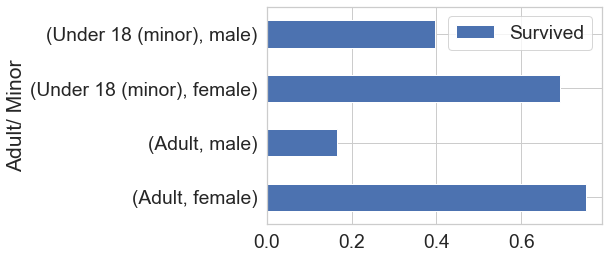

In [126]:
adult_or_minor_pivot_table = train.pivot_table(values=['Survived'], index=['Adult_or_minor', 'Sex'])
adult_or_minor_pivot_table
adult_or_minor_pivot_table.plot(kind='barh')
plt.ylabel('Adult/ Minor')

# Embarked with survival

In [127]:
embarked_pivot_table=train.pivot_table(values=['Survived'], index='Embarked')
embarked_pivot_table

,Survived
Embarked,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


It looks like, Passengers who boarded the Titanic from Southampton were the least fornunate. We need to analyze more. Let's do it with Passenger Class.

In [128]:
embarked_passenger_class_pivot_table = train.pivot_table(values=['Survived'], index=['Embarked', 'Pclass'])
embarked_passenger_class_pivot_table

Survived
Embarked    Pclass             
Cherbourg   1st class  0.694118
            2nd class  0.529412
            3rd class  0.378788
Queenstown  1st class  0.500000
            2nd class  0.666667
            3rd class  0.375000
Southampton 1st class  0.582677
            2nd class  0.463415
            3rd class  0.189802

3rd Class passengers who boarded from Souththampon, were the least fortunate.

Text(0, 0.5, 'Embarkeded/ Passenger Class')

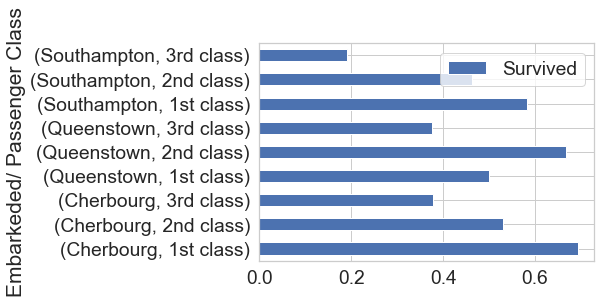

In [129]:
embarked_passenger_class_pivot_table.plot(kind = 'barh')
plt.ylabel('Embarkeded/ Passenger Class')

# Cabin & Passenger Class with Survival

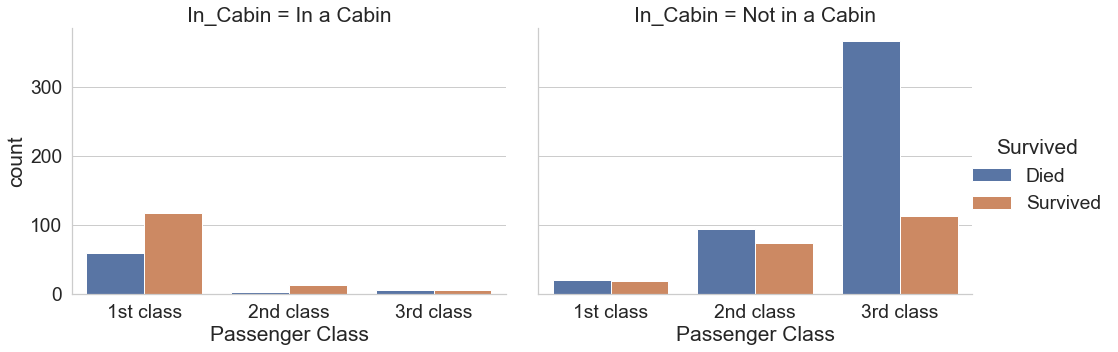

In [130]:
g = sns.catplot(col="In_Cabin", x='Pclass', hue="Survived", kind="count", data=train.sort_values(by='Pclass'));
new_labels = ['Died', 'Survived']
for t, l in zip(g._legend.texts, new_labels): 
    t.set_text(l)
g.fig.set_figwidth(16)
g.set(xlabel="Passenger Class")

It looks like being in a cabin, somehow helped with Survival

#Tickets

In [131]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

There are 681 unique tickets out of 891 passengers. It seems some passengers shared a single ticket.

In [132]:
train['Ticket'].value_counts()

CA. 2343    7
1601        7
347082      7
CA 2144     6
347088      6
           ..
113787      1
2674        1
PC 17754    1
234360      1
349234      1
Name: Ticket, Length: 681, dtype: int64

The point of sharing a single ticket by many passengers is shown above.